# PROJET FINAL IRIS 

1. COMPREHENSION DU DATASET 

Le jeu de données Iris est un ensemble de données classique utilisé en statistiques et en apprentissage automatique. Il contient des mesures de différentes parties des fleurs de trois espèces d'iris : iris setosa, iris versicolor et iris virginica. Les mesures incluent la longueur et la largeur des sépales et des pétales en centimètres.L'objectif est de prédire l'espèce d'iris en fonction de ses mesures.


2. IMPORTATION DES BIBLIOTHEQUES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import os
import joblib

In [4]:
df = pd.read_csv("iris.csv")
df

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [5]:
# Voir les differents colonnes de ce dataset 
df.columns

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
# Voir les differents varietés de plantes qui se trouvent dans le dataset
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
# Voir le nombre de chaque especes de plantes 
df.Species.value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [17]:
# Valeurs statistiques des differents differents colonnes contenants des valeurs nulles 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
Sepal.Length,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.80,3.00,3.30,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.60,4.35,5.10,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.30,1.30,1.80,2.5


In [19]:
# Faire des etude statistiques en excluant les valeurs numeriques 
df.describe(exclude =np.number).T

,count,unique,top,freq
Species,150,3,setosa,50


In [20]:
# Voir si y'a des valeurs nulles
df.isnull().sum()

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

#### OBSERVATION
On constate que y'a pas de valeurs nulles dans le dataset et aussi il y'a une seule colonne qui n'est pas de types numeriques elle est catergorique et c'est le champ Species qui designe les types de plantes. Les especes de plantes sont tous egaux (50 pour chacun). 

Nous avons aussi une colonne qui n'a pas de non (unnamed). On peut le supprimer parce qu'on sait pas à quoi ça sert 

##### Target
La variable target pour nous ça sera Species

In [21]:
#Suppression de la colonne 'Unnamed:0'
df=df.drop(df.columns[0],axis=1)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### L'ANALYSE EXPLORATOIRE DES DONNEES 

#### COMPRENDRE LA VARIABLE SPECIES 

##### On va d'abord etudier la variable categorique du dataset qui est Species.  On va d'abord faire une diagramme Circulaire pour voir leur proportion 

([<matplotlib.patches.Wedge at 0x1eb9a30fbd0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.33%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33%')])

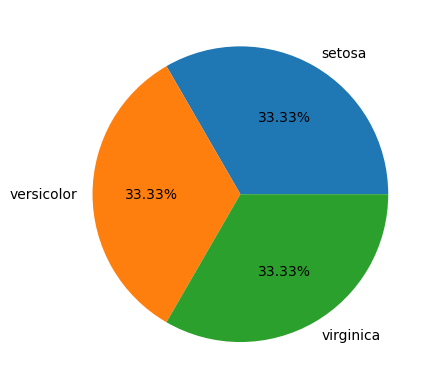

In [22]:
plt.pie(df.Species.value_counts(),labels=df.Species.value_counts().index,autopct='%.2f%%')

#####  On va etudier la variable target Species en fonction des variables numeriques 

<Axes: xlabel='Species', ylabel='Sepal.Length'>

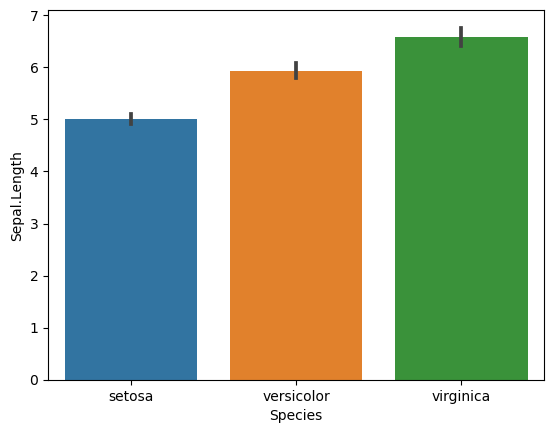

In [30]:
#Ici nous faisons , la comparaison de la moyenne des longeurs des petal entre les divers espèces
sns.barplot(x="Species",y="Sepal.Length",data=df)

<Axes: xlabel='Species', ylabel='Sepal.Width'>

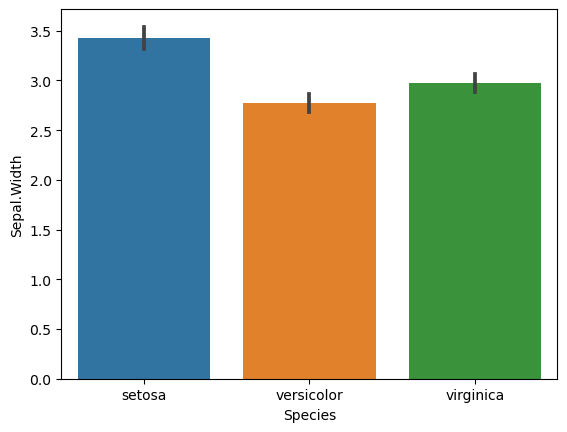

In [32]:
# L'etudes des especes en fonction de la largeur des sepals
sns.barplot(x="Species",y="Sepal.Width",data=df)

##### Observation
On constate à l'aide de ces diagrammes en barres que la Virginica a les sepales les plus long que le Setosa et Versicolor mais pour ce qui est de la largeur c'est le Setosa qui est plus large que les autres suivis du Virginica

<Axes: xlabel='Species', ylabel='Petal.Length'>

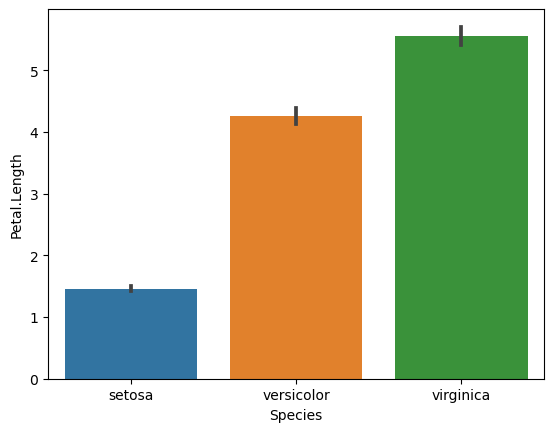

In [35]:
# L'etudes des especes en fonction de la Longueur des Petals
sns.barplot(x="Species",y="Petal.Length",data=df)

<Axes: xlabel='Species', ylabel='Petal.Width'>

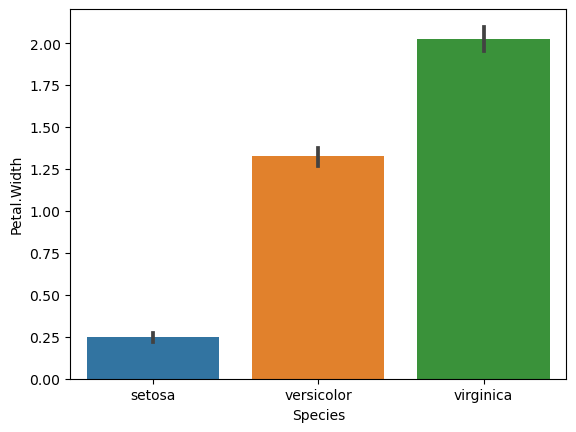

In [34]:
# L'etudes des especes en fonction de la largeur des Petals
sns.barplot(x="Species",y="Petal.Width",data=df)

##### OBSERVATION
Pour ce qui est de la longueur et de la largeur des Species on constate que le Virginica a les petales les plus longs et les plus larges que les autres especes comme Setosa ou Versicolor 

<Axes: >

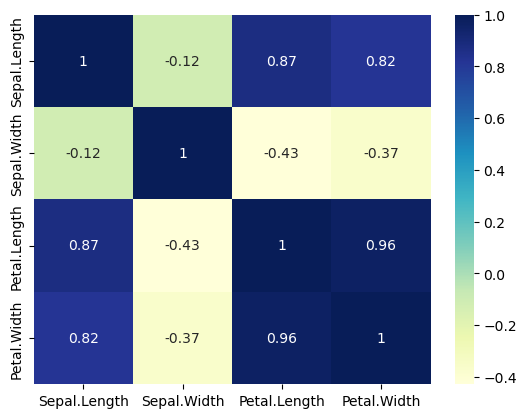

In [37]:
#Vérifions la corrélation entre les variables numériques
sns.heatmap(df.corr(numeric_only=True),cmap="YlGnBu",annot=True)

##### sepal length et petal width ont une correlation entre eux

<Axes: xlabel='Sepal.Length', ylabel='Petal.Width'>

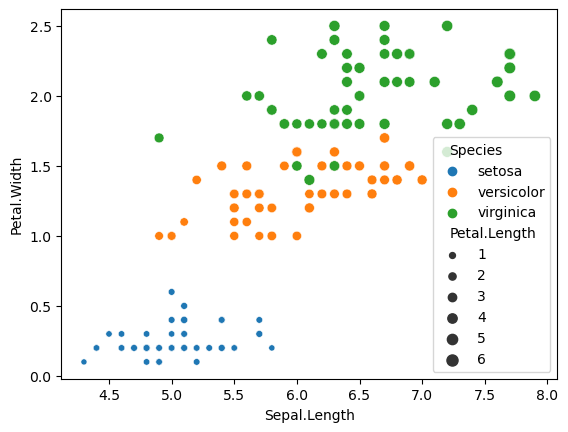

In [38]:
#Vérifions la corrélation de la longeur des sepal et de la largeur des petal
sns.scatterplot(x="Sepal.Length",y="Petal.Width",data=df,hue="Species",size="Petal.Length")

#### DATA TRANSFORMATION

In [39]:
# identifier la colonne catégorique dans le dataset
tar=[i for i in df.columns if df[i].dtype=='object']
tar

['Species']

In [40]:
df['Species']=df['Species'].replace({'virginica':0,'versicolor':1,'setosa':2}) 
df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species           int64
dtype: object

In [41]:
# identifier les colonnes numériques dans le dataset
numobject = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numobject

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

#### MODEL BULDING 

Divisez les données en ensembles d'entraînement et de test. L'ensemble d'entraînement est utilisé pour ajuster les paramètres du modèle et l'ensemble de test est utilisé pour évaluer les performances finales du modèle sur des données non vues.

In [42]:
X=df.drop('Species',axis=1)
Y=df['Species']

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.5,random_state=35)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(75, 4)
(75, 4)
(75,)
(75,)


In [45]:
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('XGB',xgb.XGBClassifier())
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation and Calculate average performance metrics
    
    avg_accuracy = cross_val_score(clf, xtrain,ytrain, cv=5, scoring='accuracy').mean()
    avg_precision = cross_val_score(clf, xtrain, ytrain, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, xtrain, ytrain, cv=5, scoring='recall_macro').mean()
    
    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.3f}')
    print(f'Average Precision: {avg_precision:.3f}')
    print(f'Average Recall: {avg_recall:.3f}')
    print('-----------------------')

Classifier: Logistic Regression
Average Accuracy: 0.947
Average Precision: 0.956
Average Recall: 0.951
-----------------------
Classifier: Decision Tree
Average Accuracy: 0.987
Average Precision: 0.989
Average Recall: 0.987
-----------------------
Classifier: Random Forest
Average Accuracy: 0.960
Average Precision: 0.978
Average Recall: 0.962
-----------------------
Classifier: KNN
Average Accuracy: 0.960
Average Precision: 0.967
Average Recall: 0.964
-----------------------
Classifier: XGB
Average Accuracy: 0.960
Average Precision: 0.964
Average Recall: 0.962
-----------------------


In [46]:
#Method to evaluate the performance of the model
def evaluate_model(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    
    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='Reds',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       0.89      0.93      0.91        27
           2       1.00      1.00      1.00        25

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75


---------------------------------------------



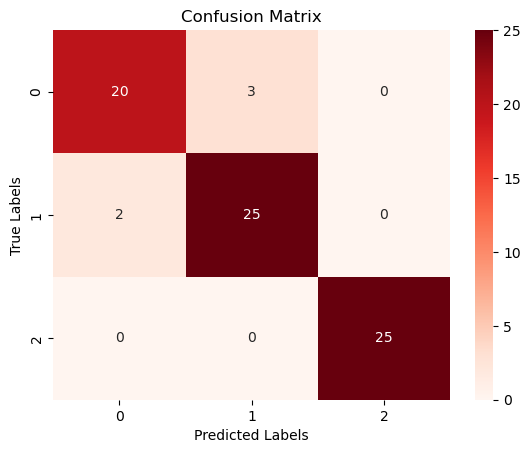

In [47]:
# Créer le classifieur XGB
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

# Entraîner le classifieur
rf_classifier.fit(xtrain, ytrain)

# Prédiction sur les données de test
ypred = rf_classifier.predict(xtest)

# Évaluation du modèle
#Compute Accuracy
evaluate_model(ytest,ypred)

#### MODEL SAVING 

In [48]:
#Obtenir le chemin vers le projet
Path=os.getcwd()
Path

'C:\\Users\\hp\\Desktop\\L3 CS\\Machine Learning'

In [49]:
#l'enregistrement du modèle 
joblib.dump(rf_classifier, Path+'-'+'Model_Iris.pkl')

['C:\\Users\\hp\\Desktop\\L3 CS\\Machine Learning-Model_Iris.pkl']